In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [136]:
df = pd.read_csv("C:/Users/nubem/Desktop/CURSO RNA ESTIMACIÓN DE RECURSOS/2. Ejemplo Perceptrón simple 1958/Implementación python/dataset_sample.csv", sep=";")
df.head()

,X,Z,LEY,MINERAL,MINERAL_TEXT
0,51,9,16.252474,1,MINERAL
1,23,11,16.265250,1,MINERAL
2,18,8,16.425449,1,MINERAL
3,60,10,16.565168,1,MINERAL
4,55,4,16.640253,1,MINERAL


In [137]:
group = df.groupby(["MINERAL"]).describe()
group["LEY"]

,count,mean,std,min,25%,50%,75%,max
MINERAL,,,,,,,,
0,72.0,28.578024,1.520871,25.427750,27.287337,28.740899,29.654960,31.808874
1,58.0,19.680602,2.114240,16.252474,17.877996,19.975307,21.196324,24.022730


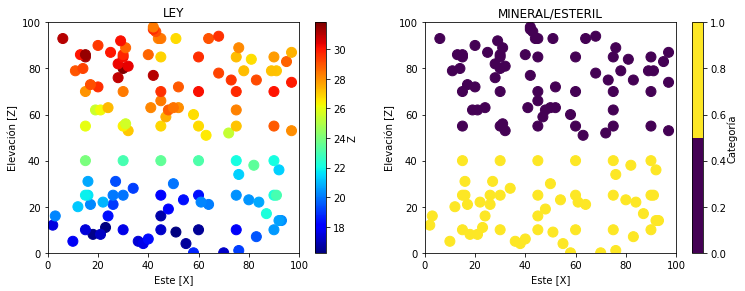

In [138]:
#fig = plt.figure(figsize=(12,4))
marker_size=100
plt.subplot(121) 
plt.scatter(df["X"], df["Z"], marker_size, df["LEY"], cmap = plt.cm.jet)
plt.xlabel('Este [X]')
plt.ylabel('Elevación [Z]')
plt.title('LEY')
plt.xlim(0,100)
plt.ylim(0,100)
cbar=plt.colorbar()
cbar.set_label('Z', labelpad=+1)
plt.subplot(122) 
plt.scatter(df["X"], df["Z"], marker_size, df["MINERAL"], cmap = plt.cm.get_cmap("viridis", 2))
plt.xlabel('Este [X]')
plt.ylabel('Elevación [Z]')
plt.title('MINERAL/ESTERIL')
plt.xlim(0,100)
plt.ylim(0,100)
cbar=plt.colorbar()
cbar.set_label('Categoría', labelpad=+1)
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.6, top=0.8, wspace=0.2, hspace=0.3)
plt.show()

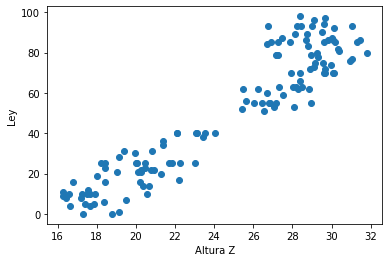

In [139]:
plt.scatter(df["LEY"], df["Z"]) #Las variables que se empleen para este modelo deben ser proporcionales guardar alguna relación.
plt.xlabel("Altura Z")
plt.ylabel("Ley")
plt.show()

In [140]:
df_reduced = df.drop(["X", "MINERAL_TEXT"], axis=1)
df_reduced.head() #X y Z seran las variables de entrada, y Mineral será el target.

,Z,LEY,MINERAL
0,9,16.252474,1
1,11,16.265250,1
2,8,16.425449,1
3,10,16.565168,1
4,4,16.640253,1


In [141]:
# Separamos las etiquetas de salida del resto de caracteristicas del conjunto de datos
X_df = df_reduced[["LEY", "Z"]]
y_df = df_reduced["MINERAL"]

In [142]:
from sklearn.linear_model import Perceptron

clf = Perceptron(max_iter=1000, random_state=40)
clf.fit(X_df, y_df)

Perceptron(random_state=40)

In [143]:
# Parametros del modelo
clf.coef_

array([[ 237.17031947, -131.        ]])

In [144]:
# Terminio de interceptacion
clf.intercept_

array([17.])

In [145]:
# z(x) = x1*w1 + x2*w2 + b = x1*2.7 + x2*-131 + (17)

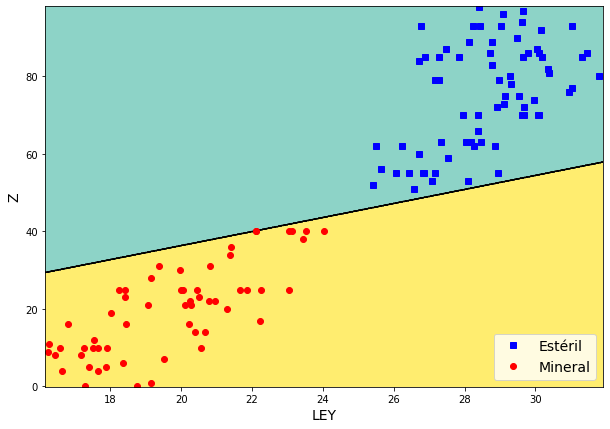

In [146]:
X = X_df.values

mins = X.min(axis=0) - 0.1
maxs = X.max(axis=0) + 0.1

xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], 1000),
                    np.linspace(mins[1], maxs[1], 1000))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

fig = plt.figure(figsize=(10, 7))

plt.contourf(xx, yy, Z, cmap="Set3")
plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), linewidths=1, colors='k')

plt.plot(X[:, 0][y_df==0], X[:, 1][y_df==0], 'bs', label="Estéril")
plt.plot(X[:, 0][y_df==1], X[:, 1][y_df==1], 'ro', label="Mineral")

plt.xlabel("LEY", fontsize=14)
plt.ylabel("Z", fontsize=14)
plt.legend(loc="lower right", fontsize=14)

plt.show()

In [147]:
y_pred = clf.predict(X_df) #en la variable y_pred, se guardan las predicciones del modelo a partir de los datos de entrada en X_df

In [148]:
from sklearn.metrics import accuracy_score

In [149]:
accuracy_score(y_df, y_pred) #precición del 100% del modelo

1.0